# The effects of the Covid 19 in Argentina using Apache Spark: comparing employment rates between 2019 and 2020.

We download "https://infra.datos.gob.ar/catalog/sspm/dataset/154/distribution/154.1/download/asalariados-registrados-sector-privado-segun-provincia-datos-con-estacionalidad.csv", from "datos.gob.ar", using Pandas library.
Then we create a dataframe using Pyspark, too which we add a column "total" where we sum the employees of every province by month of the year. 
Using that we compared the amount between 2019 and 2020 by month, showing it in a graph.

In [4]:
import pandas as pd
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import numpy as np

pdDF = pd.read_csv('https://infra.datos.gob.ar/catalog/sspm/dataset/154/distribution/154.1/download/asalariados-registrados-sector-privado-segun-provincia-datos-con-estacionalidad.csv')

sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

df = spark.createDataFrame(pdDF)

df = df.withColumn('total',(df[df.columns[1]] + df[df.columns[2]] + df[df.columns[3]] + df[df.columns[4]] + 
                            df[df.columns[5]] + df[df.columns[6]] + df[df.columns[7]] + df[df.columns[8]] + 
                            df[df.columns[9]] + df[df.columns[10]] + df[df.columns[11]] + df[df.columns[12]] + 
                            df[df.columns[13]] + df[df.columns[14]] + df[df.columns[15]] + df[df.columns[16]] + 
                            df[df.columns[17]] + df[df.columns[18]] + df[df.columns[19]] + df[df.columns[20]] + 
                            df[df.columns[21]] + df[df.columns[22]] + df[df.columns[23]] + df[df.columns[24]]))

In [5]:
empleados2019 = df.select('total').where(col('indice_tiempo').startswith('2019'))

empleados_2019 = list()
for line in empleados2019.collect():
    line = float(line[0])
    empleados_2019.append(line)

empleados2020 = df.select('total').where(col('indice_tiempo').startswith('2020'))

empleados_2020 = list()
for line in empleados2020.collect():
    line = float(line[0])
    empleados_2020.append(line)

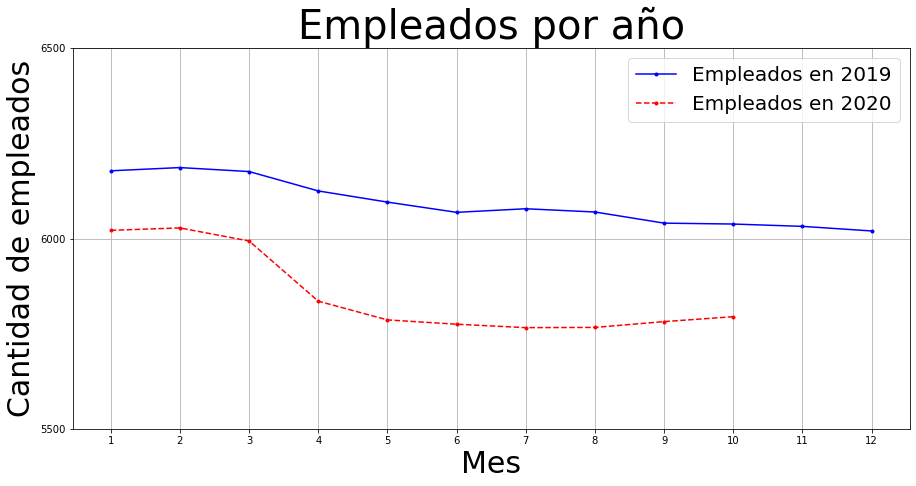

In [6]:
x = np.arange(1,13,1)
x2 = np.arange(1, 11, 1)
y = np.arange(5500, 7000, 500)

plt.plot(x, empleados_2019, 'b.-', label='Empleados en 2019')
plt.plot(x2, empleados_2020, 'r.--', label='Empleados en 2020')
plt.title('Empleados por año', fontdict= {'fontsize':40})
plt.gcf().set_size_inches(15, 7)
plt.xlabel('Mes', fontdict = {'fontsize':30})
plt.ylabel('Cantidad de empleados', fontdict = {'fontsize':30})
plt.xticks(x)
plt.yticks(y)
plt.legend(fontsize=20)
plt.grid()
plt.show()